## Digit Recognization

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression

### Load Data

In [3]:
digits = datasets.load_digits()

### Print Sample

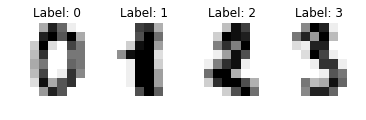

In [4]:
samples = list(zip(digits.images, digits.target))
for id, (img, label) in enumerate(samples[:4]):
    plt.subplot(1, 4, id + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label)
plt.show()    

In [9]:
n = len(digits.images)
data = digits.images.reshape(n, -1)
print(data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


### Model

In [11]:
model = LogisticRegression(C = 1e5)

### Split and Train Data

In [12]:
model.fit(data[:n//2], digits.target[:n//2])

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [13]:
answer = digits.target[n//2:]
pred = model.predict(data[n//2:])

### Score on Training Set

In [14]:
metrics.confusion_matrix(answer, pred)

array([[84,  0,  0,  0,  1,  1,  2,  0,  0,  0],
       [ 1, 76,  2,  2,  0,  0,  0,  0,  8,  2],
       [ 1,  0, 85,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 76,  0,  7,  0,  2,  3,  2],
       [ 1,  2,  0,  0, 85,  0,  1,  0,  2,  1],
       [ 0,  2,  0,  0,  0, 83,  2,  0,  0,  4],
       [ 0,  0,  1,  0,  0,  0, 90,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  5,  0, 79,  1,  3],
       [ 0,  5,  7,  3,  3,  3,  1,  1, 62,  3],
       [ 2,  3,  0,  1,  0,  0,  0,  0,  2, 84]])

### Prediction Sample

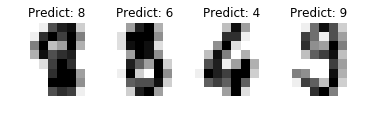

In [15]:
samples = list(zip(digits.images[n//2:], pred))
for id, (img, label) in enumerate(samples[:4]):
    plt.subplot(1, 4, id + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Predict: %i' % label)
plt.show()    